In [93]:
import sys
sys.path.append("D:\python\lib\site-packages")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io
import pandas as pd

import itertools

from sklearn import preprocessing, svm, utils, datasets
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [13]:
data_app = pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep=',')
print(data_app.shape)

head = data_app.columns
print(head)

(10841, 13)
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [14]:
print(data_app.shape)

head = data_app.columns
print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

data_app_c = np.array(data_app)

i=0
for i in range(len(data_app_c[:])):
    if data_app_c[i][5] == "Free":
        print("THIS: ", data_app_c[i])
        data_app_c1 = np.delete(data_app_c, i, 0)

data_app_c = data_app_c1


i=0
for i in range(len(data_app_c[:])):
    for char in data_app_c[i][5]:
        if char in " ?.!/;:+,":
            data_app_c[i][5] = data_app_c[i][5].replace(char,'')
    if float(data_app_c[i][5]) <= 100:
        data_app_c[i][5] = 100
    if float(data_app_c[i][5]) > 100 and int(data_app_c[i][5])<= 5000:
        data_app_c[i][5] = 5000
    if float(data_app_c[i][5]) > 5000 and int(data_app_c[i][5])<= 50000:
        data_app_c[i][5] = 50000
    if float(data_app_c[i][5]) > 50000 and int(data_app_c[i][5])<= 500000:
        data_app_c[i][5] = 500000
    if float(data_app_c[i][5]) > 500000 and int(data_app_c[i][5])<= 5000000:
        data_app_c[i][5] = 5000000
    if float(data_app_c[i][5]) > 5000000:
        data_app_c[i][5] = 10000000
        
for i in range(len(data_app_c[:])):
    if data_app_c[i][4].endswith("M"):
        data_app_c[i][4] = data_app_c[i][4][:-1]
    if data_app_c[i][4] == "Varies with device":
        data_app_c[i][4] = float("NaN")
    elif data_app_c[i][4].endswith("k"):
        data_app_c[i][4] = float(data_app_c[i][4][:-1])/1000
    if data_app_c[i][2] == "#¡NUM!":
        data_app_c[i][2] = float("NaN")
    if data_app_c[i][6] == 'Free':     #free is encoded as 0
        data_app_c[i][6] = 0
    if data_app_c[i][6] == 'Paid':     #paid is encoded as 1
        data_app_c[i][6] = 1 
 
print(data_app_c[2])


(10841, 13)
----
0 App
1 Category
2 Rating
3 Reviews
4 Size
5 Installs
6 Type
7 Price
8 Content Rating
9 Genres
10 Last Updated
11 Current Ver
12 Android Ver
----
THIS:  ['Life Made WI-Fi Touchscreen Photo Frame' '1.9' 19.0 '3.0M' '1,000+'
 'Free' '0' 'Everyone' nan 'February 11, 2018' '1.0.19' '4.0 and up' nan]
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']


In [15]:
data_app_cN = pd.DataFrame(data_app_c)
data_app_cN = data_app_cN.dropna()

data_app_cN = data_app_cN.values
print(data_app_c.shape)
print(data_app_cN.shape)

print(data_app_c[2])
print(data_app_cN[2])

(10840, 13)
(7723, 13)
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']


In [16]:
#transforming numerical values to float 
for i in range(len(data_app_c[:])):
    data_app_c[i][2] = float(data_app_c[i][2]) #Rating
    data_app_c[i][3] = float(data_app_c[i][3]) #Reviews
    data_app_c[i][4] = float(data_app_c[i][4]) #Size
    data_app_c[i][5] = int(data_app_c[i][5]) #Installs

        
#delete the name category for everything
del_categories = [0, 7, 9, 10, 11, 12]
data_app_c = np.delete(data_app_c, del_categories, 1)
data_app_cN = np.delete(data_app_cN, del_categories, 1)
head = np.delete(head, del_categories)

print(data_app_c.shape)
print(data_app_cN.shape)
print("----")


print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

# columns = [1'Category', 2'Rating', 3'Reviews', 4'Size', 5 Installs', 6'Type', 7'Content Rating'])


(10840, 7)
(7723, 7)
----
----
0 Category
1 Rating
2 Reviews
3 Size
4 Installs
5 Type
6 Content Rating
----


In [17]:
le = preprocessing.LabelEncoder()

a = le.fit_transform(data_app_cN.T[0].astype(str)) #Category
data_app_cN.T[0] = a
a = le.fit_transform(data_app_cN.T[5].astype(str)) #Type
data_app_cN.T[5] = a
a = le.fit_transform(data_app_cN.T[6].astype(str)) #Content Rating
data_app_cN.T[6] = a

a = le.fit_transform(data_app_c.T[0].astype(str)) #Category
data_app_c.T[0] = a
a = le.fit_transform(data_app_c.T[5].astype(str)) #Type
data_app_c.T[5] = a
a = le.fit_transform(data_app_c.T[6].astype(str)) #Content Rating
data_app_c.T[6] = a

#transforming numerical values to float 
for i in range(len(data_app_cN[:])):
    for h in range(len(head)):
        data_app_cN[i][h] = float(data_app_cN[i][h])
        
#transforming numerical values to float 
for i in range(len(data_app_c[:])):
    for h in range(len(head)):
        data_app_c[i][h] = float(data_app_c[i][h])
        
        

#transforming numerical values to float 
for i in range(len(data_app_cN[:])):
    data_app_cN[i][4] = int(data_app_cN[i][4])
    
#transforming numerical values to float 
for i in range(len(data_app_c[:])):
    data_app_c[i][4] = int(data_app_c[i][4])


print(data_app_cN)
print(data_app_cN.shape)
print(data_app_c)
print(data_app_c.shape)

[[0.0 4.1 159.0 ... 50000 0.0 1.0]
 [0.0 3.9 967.0 ... 500000 0.0 1.0]
 [0.0 4.7 87510.0 ... 5000000 0.0 1.0]
 ...
 [11.0 4.5 38.0 ... 5000 0.0 1.0]
 [11.0 5.0 4.0 ... 100 0.0 1.0]
 [18.0 4.5 398307.0 ... 10000000 0.0 1.0]]
(7723, 7)
[[0.0 4.1 159.0 ... 50000 0.0 1.0]
 [0.0 3.9 967.0 ... 500000 0.0 1.0]
 [0.0 4.7 87510.0 ... 5000000 0.0 1.0]
 ...
 [20.0 nan 3.0 ... 5000 0.0 1.0]
 [3.0 4.5 114.0 ... 5000 0.0 3.0]
 [18.0 4.5 398307.0 ... 10000000 0.0 1.0]]
(10840, 7)


# Feature Importances

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Index(['Category', 'Rating', 'Reviews', 'Size', 'Type', 'Content Rating'], dtype='object')
Feature ranking:
1. feature 2 (0.503813)
Reviews 0.5038128337729724
2. feature 3 (0.195398)
Size 0.1953975165850007
3. feature 1 (0.147305)
Rating 0.14730495755803943
4. feature 0 (0.118761)
Category 0.11876124103256906
5. feature 5 (0.019742)
Content Rating 0.0197415312108242
6. feature 4 (0.014982)
Type 0.014981919840594054


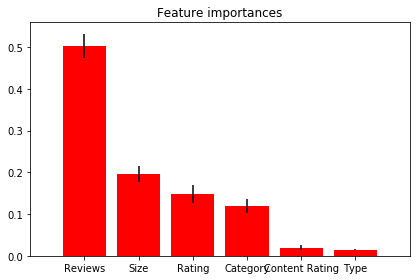

In [7]:
#FEATURE IMPORTANCES
from sklearn.ensemble import ExtraTreesClassifier

Xa = data_app_cN[:, [0, 1, 2, 3, 5, 6]]
Ya = data_app_cN[:,4]
X_head = np.delete(head, 4)
print(X_head)
#features_names = np.unique(Ya.astype('int')).astype("str")

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(Xa.astype("float"), Ya.astype("int"))
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Xa.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(X_head[indices[f]], importances[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.tight_layout()
plt.bar(range(Xa.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Xa.shape[1]), X_head[indices])
plt.xlim([-1, Xa.shape[1]])
plt.show()

# Cross Validation

In [94]:
# from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression

Xa = data_app_cN[:, [0, 1, 2, 3, 5, 6]]
# Xa = data_app_cN[:, [2]]
Ya = data_app_cN[:,4]
install_win = np.unique(Ya.astype('int')).astype("str")

X = Xa
y = Ya

C_range = np.geomspace(.0001, 1, 50)
#gamma_range = np.geomspace(.00001, 10, 20)
param_grid = dict(C=C_range)

# sss = StratifiedShuffleSplit(y, 500, test_size=0.2, random_state=42)
cross_validate = StratifiedShuffleSplit(n_splits=10, test_size=0.3)

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=cross_validate, verbose=10)
grid.fit(X.astype("float"), y.astype("int"))
print("The best parameters", (grid.best_params_, grid.best_score_))


Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.4812257229175658, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.5632283124730255, total=   0.0s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ............... C=0.0001, score=0.5360379801467414, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.5485541648683643, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.4199395770392749, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.5459646094087182, total=   0.0s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s


[CV] ............... C=0.0001, score=0.5671126456624946, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.5468277945619335, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.5934397928355633, total=   0.0s
[CV] C=0.0001 ........................................................
[CV] ............... C=0.0001, score=0.5489857574449719, total=   0.0s
[CV] C=0.00012067926406393288 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.00012067926406393288, score=0.4812257229175658, total=   0.0s
[CV] C=0.00012067926406393288 ........................................
[CV]  C=0.00012067926406393288, score=0.5627967198964178, total=   0.0s
[CV] C=0.00012067926406393288 ........................................
[CV]  C=0.00012067926406393288, score=0.5364695727233492, total=   0.0s
[CV] C=0.00012067926406393288 ........................................
[CV]  C=0.00012067926406393288, score=0.5481225722917565, total=   0.0s
[CV] C=0.00012067926406393288 ........................................
[CV]  C=0.00012067926406393288, score=0.4199395770392749, total=   0.0s
[CV] C=0.00012067926406393288 ........................................
[CV]  C=0.00012067926406393288, score=0.5459646094087182, total=   0.0s
[CV] C=0.00012067926406393288 ........................................
[CV] . C=0.00012067926406393288, score=0.56797583081571, total=   0.0s
[CV] C=0.00012067926406393288 ........................................


[CV]  C=0.0003727593720314938, score=0.5619335347432024, total=   0.0s
[CV] C=0.0003727593720314938 .........................................
[CV]  C=0.0003727593720314938, score=0.5356063875701338, total=   0.0s
[CV] C=0.0003727593720314938 .........................................
[CV]  C=0.0003727593720314938, score=0.5476909797151489, total=   0.0s
[CV] C=0.0003727593720314938 .........................................
[CV]  C=0.0003727593720314938, score=0.4199395770392749, total=   0.0s
[CV] C=0.0003727593720314938 .........................................
[CV]  C=0.0003727593720314938, score=0.5459646094087182, total=   0.0s
[CV] C=0.0003727593720314938 .........................................
[CV] .. C=0.0003727593720314938, score=0.56797583081571, total=   0.0s
[CV] C=0.0003727593720314938 .........................................
[CV]  C=0.0003727593720314938, score=0.5472593871385412, total=   0.0s
[CV] C=0.0003727593720314938 .........................................
[CV]  

[CV]  C=0.0011513953993264468, score=0.5364695727233492, total=   0.0s
[CV] C=0.0011513953993264468 .........................................
[CV]  C=0.0011513953993264468, score=0.5476909797151489, total=   0.0s
[CV] C=0.0011513953993264468 .........................................
[CV]  C=0.0011513953993264468, score=0.4199395770392749, total=   0.0s
[CV] C=0.0011513953993264468 .........................................
[CV]  C=0.0011513953993264468, score=0.5459646094087182, total=   0.0s
[CV] C=0.0011513953993264468 .........................................
[CV] .. C=0.0011513953993264468, score=0.56797583081571, total=   0.0s
[CV] C=0.0011513953993264468 .........................................
[CV]  C=0.0011513953993264468, score=0.5472593871385412, total=   0.0s
[CV] C=0.0011513953993264468 .........................................
[CV]  C=0.0011513953993264468, score=0.5925766076823479, total=   0.0s
[CV] C=0.0011513953993264468 .........................................
[CV]  

[CV] . C=0.0035564803062231283, score=0.486404833836858, total=   0.0s
[CV] C=0.0035564803062231283 .........................................
[CV]  C=0.0035564803062231283, score=0.5623651273198101, total=   0.0s
[CV] C=0.0035564803062231283 .........................................
[CV]  C=0.0035564803062231283, score=0.5364695727233492, total=   0.0s
[CV] C=0.0035564803062231283 .........................................
[CV]  C=0.0035564803062231283, score=0.5472593871385412, total=   0.0s
[CV] C=0.0035564803062231283 .........................................
[CV]  C=0.0035564803062231283, score=0.4199395770392749, total=   0.0s
[CV] C=0.0035564803062231283 .........................................
[CV]  C=0.0035564803062231283, score=0.5459646094087182, total=   0.0s
[CV] C=0.0035564803062231283 .........................................
[CV] .. C=0.0035564803062231283, score=0.56797583081571, total=   0.0s
[CV] C=0.0035564803062231283 .........................................
[CV]  

[CV] .. C=0.010985411419875584, score=0.486404833836858, total=   0.0s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.5623651273198101, total=   0.0s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.5364695727233492, total=   0.0s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.5472593871385412, total=   0.0s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.4199395770392749, total=   0.0s
[CV] C=0.010985411419875584 ..........................................
[CV] . C=0.010985411419875584, score=0.5459646094087182, total=   0.0s
[CV] C=0.010985411419875584 ..........................................
[CV] ... C=0.010985411419875584, score=0.56797583081571, total=   0.0s
[CV] C=0.010985411419875584 ..........................................
[CV] .

[CV] .. C=0.02811768697974228, score=0.5472593871385412, total=   0.0s
[CV] C=0.033932217718953266 ..........................................
[CV] . C=0.033932217718953266, score=0.4868364264134657, total=   0.0s
[CV] C=0.033932217718953266 ..........................................
[CV] . C=0.033932217718953266, score=0.5623651273198101, total=   0.0s
[CV] C=0.033932217718953266 ..........................................
[CV] . C=0.033932217718953266, score=0.5360379801467414, total=   0.0s
[CV] C=0.033932217718953266 ..........................................
[CV] . C=0.033932217718953266, score=0.5472593871385412, total=   0.0s
[CV] C=0.033932217718953266 ..........................................
[CV] . C=0.033932217718953266, score=0.4199395770392749, total=   0.0s
[CV] C=0.033932217718953266 ..........................................
[CV] . C=0.033932217718953266, score=0.5468277945619335, total=   0.0s
[CV] C=0.033932217718953266 ..........................................
[CV] .

[CV] .. C=0.08685113737513521, score=0.5472593871385412, total=   0.0s
[CV] C=0.08685113737513521 ...........................................
[CV] .. C=0.08685113737513521, score=0.5925766076823479, total=   0.0s
[CV] C=0.08685113737513521 ...........................................
[CV] .. C=0.08685113737513521, score=0.5472593871385412, total=   0.0s
[CV] C=0.10481131341546852 ...........................................
[CV] .. C=0.10481131341546852, score=0.4868364264134657, total=   0.0s
[CV] C=0.10481131341546852 ...........................................
[CV] .. C=0.10481131341546852, score=0.5623651273198101, total=   0.0s
[CV] C=0.10481131341546852 ...........................................
[CV] .. C=0.10481131341546852, score=0.5360379801467414, total=   0.0s
[CV] C=0.10481131341546852 ...........................................
[CV] .. C=0.10481131341546852, score=0.5472593871385412, total=   0.0s
[CV] C=0.10481131341546852 ...........................................
[CV] .

[CV] ... C=0.2682695795279725, score=0.5472593871385412, total=   0.0s
[CV] C=0.2682695795279725 ............................................
[CV] ... C=0.2682695795279725, score=0.5925766076823479, total=   0.0s
[CV] C=0.2682695795279725 ............................................
[CV] ... C=0.2682695795279725, score=0.5472593871385412, total=   0.0s
[CV] C=0.32374575428176433 ...........................................
[CV] .. C=0.32374575428176433, score=0.4868364264134657, total=   0.0s
[CV] C=0.32374575428176433 ...........................................
[CV] .. C=0.32374575428176433, score=0.5623651273198101, total=   0.0s
[CV] C=0.32374575428176433 ...........................................
[CV] .. C=0.32374575428176433, score=0.5360379801467414, total=   0.0s
[CV] C=0.32374575428176433 ...........................................
[CV] .. C=0.32374575428176433, score=0.5472593871385412, total=   0.0s
[CV] C=0.32374575428176433 ...........................................
[CV] .

[CV] ... C=0.8286427728546842, score=0.5468277945619335, total=   0.0s
[CV] C=0.8286427728546842 ............................................
[CV] ... C=0.8286427728546842, score=0.5688390159689254, total=   0.0s
[CV] C=0.8286427728546842 ............................................
[CV] ... C=0.8286427728546842, score=0.5472593871385412, total=   0.0s
[CV] C=0.8286427728546842 ............................................
[CV] ... C=0.8286427728546842, score=0.5925766076823479, total=   0.0s
[CV] C=0.8286427728546842 ............................................
[CV] ... C=0.8286427728546842, score=0.5472593871385412, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.4868364264134657, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] .................. C=1.0, score=0.5623651273198101, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   32.2s finished


In [ ]:
print(sss)       
for train_index, test_index in sss:
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     KNN.fit(X_train.astype("float"),y_train.astype("int"))
#     y2_KNN_model = KNN.predict(X_test.astype("float"))
#     print("KNN Accuracy :", accuracy_score(y_test.astype("int"), y2_KNN_model.astype("int")))
    
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Classification: fitting and prediction

In [41]:
# split into input (X) and output (Y) variables
#Xa = data_app_cN[:, [0, 1, 2, 3, 5, 6]]
# Xa = data_app_cN[:, [0, 1, 2, 3, 5, 6]]
# Ya = data_app_cN[:,4]

#X_train, X_test, y_train, y_test = train_test_split(Xa, Ya, test_size=0.2, random_state=42)

print(X_train, X_test, y_train, y_test)

#print(utils.multiclass.type_of_target(y_train.astype('int')))

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train.astype('float'), y_train.astype('int'))
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[9.0 4.2 155234.0 22.0 0.0 4.0]
 [28.0 4.5 14184910.0 52.0 0.0 1.0]
 [20.0 4.4 275.0 5.8 0.0 2.0]
 ...
 [11.0 4.3 160.0 67.0 0.0 1.0]
 [13.0 3.3 1726.0 30.0 0.0 1.0]
 [15.0 4.8 428156.0 15.0 0.0 1.0]] [[11.0 4.6 253115.0 99.0 0.0 1.0]
 [6.0 4.2 177263.0 13.0 0.0 3.0]
 [11.0 3.8 25.0 9.5 0.0 1.0]
 ...
 [11.0 4.0 15875.0 40.0 0.0 4.0]
 [11.0 4.1 105766.0 48.0 0.0 4.0]
 [14.0 4.0 90218.0 97.0 0.0 4.0]] [5000000 10000000 50000 ... 50000 500000 10000000] [10000000 10000000 5000 ... 5000000 10000000 5000000]


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
pred = clf.predict(X_test.astype('float'))
print(X_test.shape)

print("Accuracy score: ", accuracy_score(y_test.astype('int'), pred.astype("int")))

install_win = np.unique(y_train.astype('int')).astype("str")
print(install_win)

print(classification_report(y_test.astype('int'), pred.astype("int"), target_names=install_win, sample_weight=None, digits=3))

(1545, 6)
Accuracy score:  0.4064724919093851
['100' '5000' '50000' '500000' '5000000' '10000000']
             precision    recall  f1-score   support

        100      0.750     0.375     0.500        88
       5000      0.661     0.418     0.512       261
      50000      0.659     0.206     0.314       281
     500000      0.788     0.085     0.154       305
    5000000      0.311     1.000     0.474       367
   10000000      1.000     0.144     0.252       243

avg / total      0.661     0.406     0.355      1545



In [95]:
gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=1)
BNB = BernoulliNB()
LR = LogisticRegression(C = 0.828, solver='lbfgs', multi_class='multinomial', max_iter=10000)
SVC = SVC()
SDG = SGDClassifier()
LSVC = LinearSVC()

x1, x2, y1, y2 = X_train, X_test, y_train, y_test

# Train our classifier and test predict
gnb.fit(x1.astype("float"), y1.astype("int"))
y2_GNB_model = gnb.predict(x2.astype("float"))
print("GaussianNB Accuracy :", accuracy_score(y2.astype("int"), y2_GNB_model.astype("int")))

KNN.fit(x1.astype("float"),y1.astype("int"))
y2_KNN_model = KNN.predict(x2.astype("float"))
print("KNN Accuracy :", accuracy_score(y2.astype("int"), y2_KNN_model.astype("int")))

BNB.fit(x1.astype("float"),y1.astype("int"))
y2_BNB_model = BNB.predict(x2.astype("float"))
print("BNB Accuracy :", accuracy_score(y2.astype("int"), y2_BNB_model.astype("int")))

LR.fit(x1.astype("float"),y1.astype("int"))
y2_LR_model = LR.predict(x2.astype("float"))
print("LR Accuracy :", accuracy_score(y2.astype("int"), y2_LR_model.astype("int")))

SDG.fit(x1.astype("float"),y1.astype("int"))
y2_SDG_model = SDG.predict(x2.astype("float"))
print("SDG Accuracy :", accuracy_score(y2.astype("int"), y2_SDG_model.astype("int")))

SVC.fit(x1.astype("float"),y1.astype("int"))
y2_SVC_model = SVC.predict(x2.astype("float"))
print("SVC Accuracy :", accuracy_score(y2.astype("int"), y2_SVC_model.astype("int")))

LSVC.fit(x1.astype("float"),y1.astype("int"))
y2_LSVC_model = LSVC.predict(x2.astype("float"))
print("LSVC Accuracy :", accuracy_score(y2.astype("int"), y2_LSVC_model.astype("int")))


GaussianNB Accuracy : 0.5488673139158576
KNN Accuracy : 0.6485436893203883
BNB Accuracy : 0.2744336569579288
LR Accuracy : 0.6692556634304208
SDG Accuracy : 0.28802588996763756


D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SVC Accuracy : 0.4064724919093851
LSVC Accuracy : 0.45048543689320386


# Confusion Matrix Plotting

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        100      0.000     0.000     0.000        88
       5000      0.472     0.962     0.633       261
      50000      0.368     0.317     0.340       281
     500000      0.472     0.479     0.476       305
    5000000      0.690     0.583     0.632       367
   10000000      0.974     0.609     0.749       243

avg / total      0.557     0.549     0.531      1545

Confusion matrix, without normalization
[[  0  88   0   0   0   0]
 [  0 251  10   0   0   0]
 [  0 182  89  10   0   0]
 [  0  11 139 146   9   0]
 [  0   0   4 145 214   4]
 [  0   0   0   8  87 148]]
Normalized confusion matrix
[[0.   1.   0.   0.   0.   0.  ]
 [0.   0.96 0.04 0.   0.   0.  ]
 [0.   0.65 0.32 0.04 0.   0.  ]
 [0.   0.04 0.46 0.48 0.03 0.  ]
 [0.   0.   0.01 0.4  0.58 0.01]
 [0.   0.   0.   0.03 0.36 0.61]]
             precision    recall  f1-score   support

        100      0.585     0.625     0.604        88
       5000      0.614     0.586    

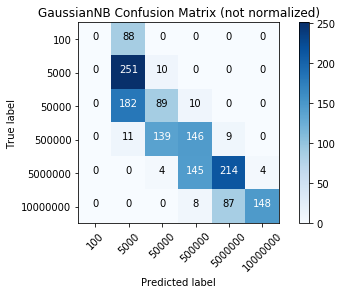

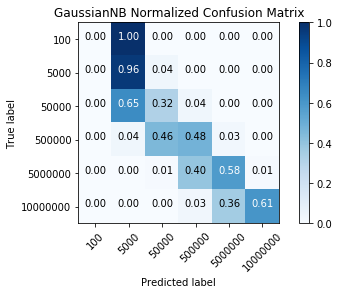

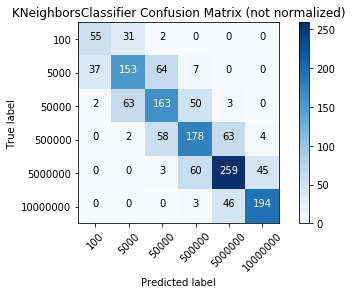

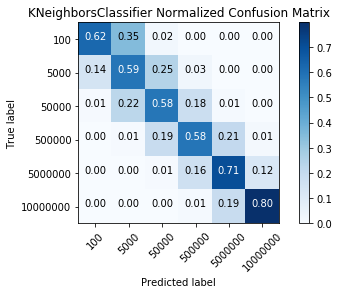

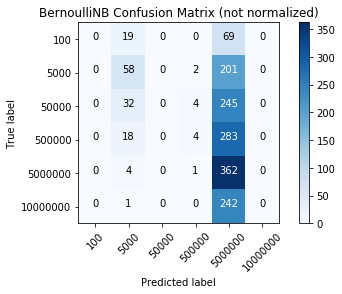

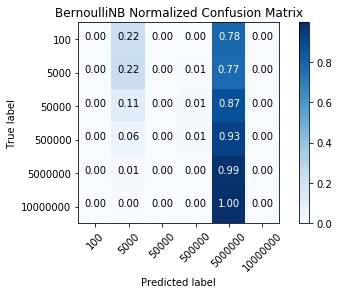

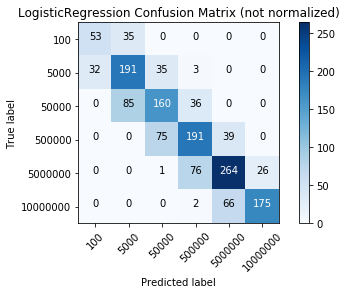

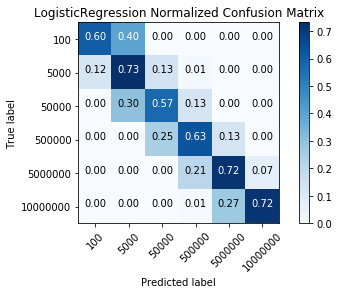

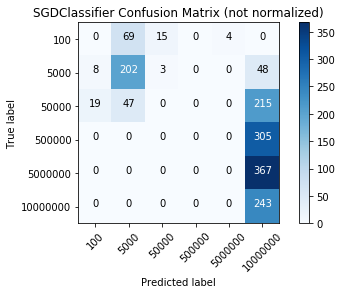

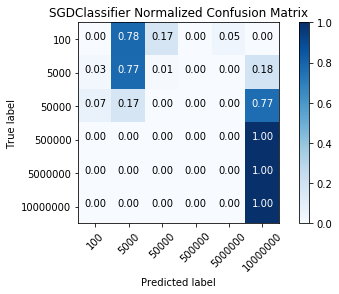

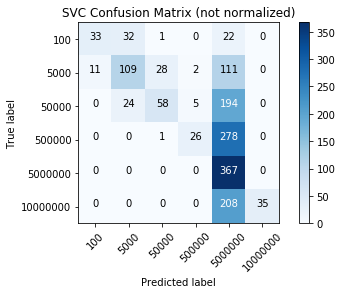

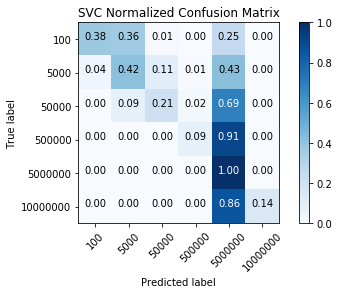

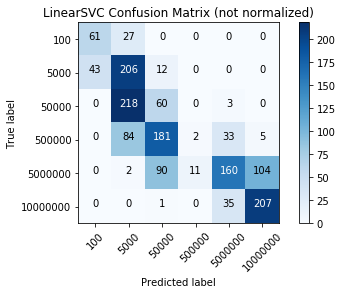

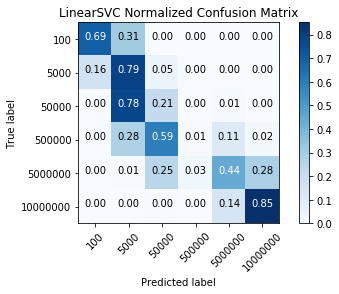

In [96]:
class_names = install_win

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

models = [y2_GNB_model, y2_KNN_model, y2_BNB_model, y2_LR_model, y2_SDG_model, y2_SVC_model, y2_LSVC_model]
modelNames = ["GaussianNB", "KNeighborsClassifier", "BernoulliNB", "LogisticRegression", "SGDClassifier", "SVC", "LinearSVC"]

for i in range(len(models)):
    print(classification_report(y2.astype('int'), models[i].astype("int"), target_names=install_win, sample_weight=None, digits=3))
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y2.astype("int"), models[i].astype("int"))
    np.set_printoptions(precision=2)
    
    A = (modelNames[i] + ' Confusion Matrix (not normalized)')
    B = (modelNames[i] + ' Normalized Confusion Matrix')
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title = A)
    plt.savefig("./Plots\Confusion Matrix/All_CrossVal_"+A+'.png')
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title = B)
    plt.savefig("./Plots\Confusion Matrix/All_CrossVal_"+B+'.png')

#plt.show()